tll549 (Ethan)'s Exploratory Functions

Email: el@tll.tl

- https://github.com/tll549/TEF
- https://pypi.org/project/TEF/


# Installation

Use the the first line for first time installation. Use the second one to upgrade anytime.

In [ ]:
!pip install TEF

In [1]:
!pip install TEF -U

  Found existing installation: TEF 0.2.2
    Uninstalling TEF-0.2.2:
      Successfully uninstalled TEF-0.2.2


In [2]:
import TEF

# Quick start

Skip to docs below if you want to know the details of functions.

Imagine you got an dirty dataset

In [3]:
import pandas as pd
import numpy as np

np.random.seed(555)
raw = pd.DataFrame({'datetime_col': ['1990-01-01', float('nan'), float('nan'), float('nan'), 
                                     '2017-01-01', float('nan')],
                    'int_col': [34, 645, 23, 4, 0, 6],
                    'float_col': [132.54, float('nan'), 21399.23, 0, 434.74, 4592309.23],
                    'bool_col': [True, False, True, False, False, False],
                    'category_col': ['a', 'a', 'b', 'b', 'b', 'c'],
                    'object_col': ['zzzzz', 'zzzz', ' ', 'nan', 'x', '   ']})
raw.bool_col = raw.bool_col.astype(object) # set it to object for demo
raw

,datetime_col,int_col,float_col,bool_col,category_col,object_col
0,1990-01-01,34,132.54,True,a,zzzzz
1,NaN,645,NaN,False,a,zzzz
2,NaN,23,21399.23,True,b,
3,NaN,4,0.00,False,b,nan
4,2017-01-01,0,434.74,False,b,x
5,NaN,6,4592309.23,False,c,


So the first thing you can do is to pass it to `auto_set_dtypes()`, it tries to detect all columns dtypes and return it for you. 

Long story short, it use regular expression to detect datatime pattern, set to `category` if the number of levels is lower than 10 (adjust in `max_num_lev`).

For here, because the dataset is tiny, I we manually set the 5th columns to `object` for demo.

## auto_set_dtypes

In [4]:
d = TEF.auto_set_dtypes(raw, set_object=[5])

before dtypes: float64(1), int64(1), object(4)
after  dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(1), object(1)


## dfmeta

Now, it comes to the main function for this package, `dfmeta()`. It tries to give you an detailed overview that you dont ever need to type anything like `.head()`, `.describe()`, `.info()`, `.dtypes` etc.

In [5]:
desc = {
    "datetime_col"            : "some explanation about this columns",
    "int_col"                 : "you <br>can use line break here",
    "float_col"               : "<li>use</li> <li>bullet</li> <li>points</li>",
    "bool_col"                : "in case anything is <mark><b>IMPORTANT</b></mark>",
    "category_col"            : "<a target='_blank' rel='noopener noreferrer' href='https://github.com/tll549/TEF'>add a link to TEF</a>",
    "object_col"              : "<b>bold</b> and <i>italic</i> ofc"
}
TEF.dfmeta(d, description=desc)

shape: (6, 6)
dtypes: bool(1), category(1), datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 388.0+ bytes


col name,idx,dtype,description,NaNs,unique counts,unique levs,summary,possible NaNs,possible dup lev,row 0,row 3,row 5
datetime_col,0,datetime64[ns],some explanation about this columns,4 67%,3 50%,NaT2017-01-01 00:00:001990-01-01 00:00:00<b,1990-01-01T00:00 1996-10-01T12:00 2003-07-03T00:00 2010-04-02T12:00 2017-01-01T00:00<br,,,1990-01-01 00:00:00,NaT,NaT
int_col,1,int64,you can use line break here,0 0%,6 100%,2366454340<b,"quantiles: [0.0, 4.5, 14.5, 31.25, 645.0] mean: 118.67 std: 258.17 cv: 2.18 skew: 1.78","""0"": 1, 16.67%",,34,4,6
float_col,2,float64,use bullet points,1 17%,6 100%,21399.234592309.23434.74132.540.0nan<b,"quantiles: [0.0, 132.54, 434.74, 21399.23, 4592309.23] mean: 922855.15 std: 2051307.76 cv: 2.22 skew: 1.50","""0"": 1, 16.67%",,132.54,0,4.59231e+06
bool_col,3,bool,in case anything is IMPORTANT,0 0%,2 33%,FalseTrue<b,False 67%True 33%<b,,,True,False,False
category_col,4,category,add a link to TEF,0 0%,3 50%,bac<b,b 50%a 33%c 17%<b,,,a,b,c
object_col,5,object,bold and italic ofc,0 0%,6 100%,zzzzz zzzznanx<b,17%zzzzz 17% 17%zzzz 17%nan 17%x 17%<b,""" "": 1, 16.67% ""nan"": 1, 16.67%","(zzzzz, zzzz)",zzzzz,nan,


The background is colored by dtypes, and every row is actually a columns in the original dataset. Every row is now a descriptive result for that column. 

- *idx* shows the index of that column
- *dtype*
- *description* is a place that you can input your own explanation, will explain more detail below
- *NaNs* shows the number of nulls and the percentage
- *unique counts* shows the number of unique values of that columns, and percentage
- *unique levs* tries to show all unique values, if that's not too much (adjust in `max_lev`), for this tiny dataset, it shows all because the default is 10
- *summary* shows 
    - for datatime, quantiles [0% (min), 25%, 50% (median), 75%, 100% (max)]
    - for int and float, quantiles, mean, standard error, CV (coefficient of variance, std/mean), skewness, it will followed by a star (\*) if it doesn't pass the normality test (skewtest), and another skewtest after taking log
    - for bool, categoy and object, it gives percentage of all levels, if not too much
- *possible NaNs* tries to detect potential null caused by manually coded values or something similar, for instance, sometimes a space ' ' or a string 'nan' actually means a NaN.
- *possible dup lev* tries to detect potential possible duplicate levels, such as sometimes 'object1111' should actually be the same value as 'object111' just because of typo.
- the rest 3 columns are randomly sample from the dataset, where we human always like an example

You may wonder, the original 6\*6 dataset now becomes a larger 6\*12 meta data, is that something useful? Indeed, it is not useful for a small dataset, but imagine an insanely large 10 millions rows \* 500 columns dataset, the summary meta dataframe will only have dimension of 500\*12! It is always a good idea to start from summary statistics and examples.

**discription**

Those columns names are not always clear and straight forward. We usually want to save a dictionary/explanation somewhere. 

This function takes an dictionary `description` that you can put brief explanations here, and just get back to here anytime when you are doing the analysis. Also, it allows you to output a HTML file as exactly what you see so that you can save it somewhere in your working directory!

First, use `get_desc_template()` to get a template, copy and paste to the chunk and start filling in your explanations, HTML code is also okay! See above example for what you can do.

In [6]:
TEF.get_desc_template(d)

desc = {
    "datetime_col"            : "",
    "int_col"                 : "",
    "float_col"               : "",
    "bool_col"                : "",
    "category_col"            : "",
    "object_col"              : ""
}


In the end, you may want to save this (hopefully) beautiful meta dataframe some where, use `save_html_standard` to automatically generate a HTML file, it also remove *unique levs*, possible errors, and samples for a concise output.

See doc for `dfmeta2html()` if you want to configure.

In [9]:
TEF.save_html_standard(d, desc, 'meta_d.html', 'This is an header in the html file')

## plot_1var

Now, the next step is usually plot histogram and have a sense about distributions. This is exactly what it does for `plot_1var()` function. It handles different dtypes and choss a way to summary it using plot.

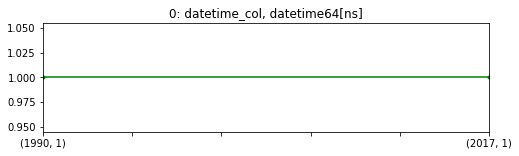

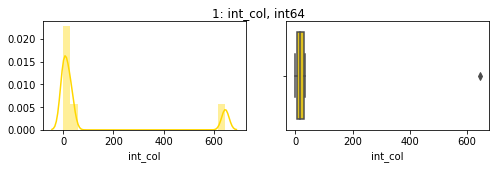

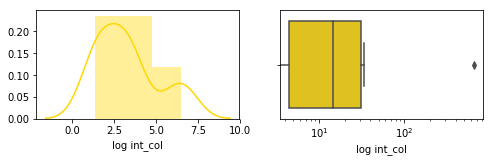

quantiles: [0.0, 4.5, 14.5, 31.25, 645.0], mean: 118.67, NaNs: 0
ignored 16.67% 0s and 0 NaNs


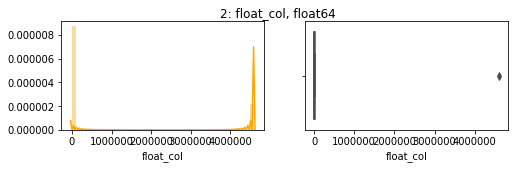

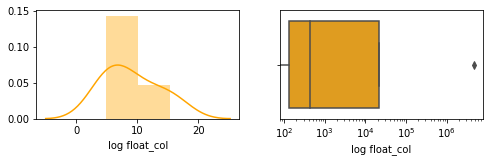

quantiles: [0.0, 132.54, 434.74, 21399.23, 4592309.23], mean: 922855.15, NaNs: 16.67%
ignored 16.67% 0s and 16.67% NaNs


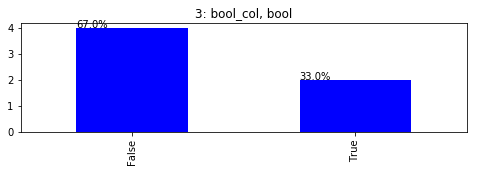

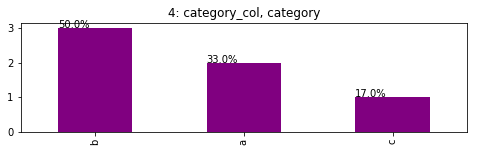

100.00% disaplyed


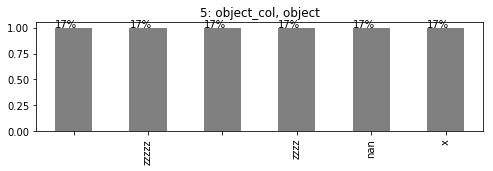

In [10]:
TEF.plot_1var(d)

## plot_1var_by_cat_y

Now if you have a dependent variable that your main interest is in. You probably are wondering the relationship between independent variables and it. Put the categorical dependent variable in the second argument and it will do the rest!

0 not yet for datetime


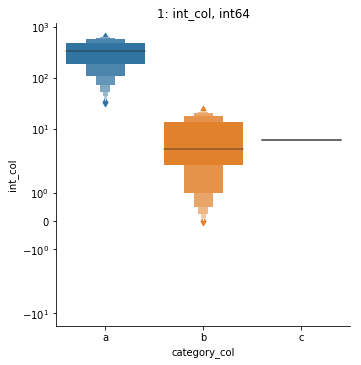

NaNs: 0


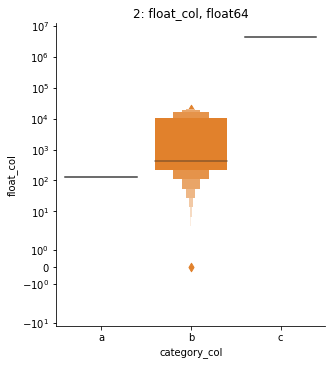

NaNs: 16.67%


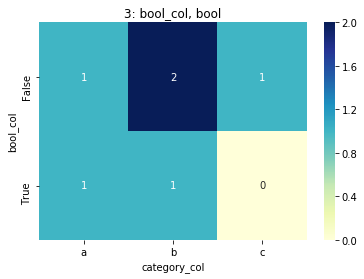

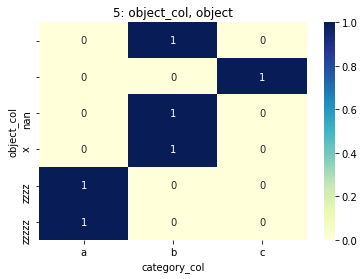

In [11]:
TEF.plot_1var_by_cat_y(d, 'category_col')

# Documentations

## auto_set_dtypes

```
auto_set_dtypes(df, max_num_lev=10, 
                set_datetime=[], set_category=[], set_int=[], set_object=[], set_bool=[],
                set_datetime_by_pattern=r'\d{4}-\d{2}-\d{2}',
                verbose=1)
```

**required package**: numpy, pandas, re, io (will import automatically when call the function, just a heads up here)

**description**
- set to datetime if the pattern is like '2018-08-08'
    - it's designed for all datetime columns in a dataset have the same format like 2019-06-06 06:06:06 (such as downloaded from DOMO)
- set to category if the number unique levels is less than max_num_lev
- set_dtypes can be used for manually configurations, set_object can be used for ID columns
- will also trying to detect possible ID columns for seaching string 'id' in them, if verbose >= 1
- notice if there are nulls between True and False columns, it should be set to bool

**args**
- df: pandas dataframe
- max_num_lev: the maximum number of levels that should be converted to category
- set_{datetime/category/int/object/bool}: a list of indices, e.g. [0, 3, 5], force these columns to be set to those dtypes
- set_datetime_by_pattern: a regular expression string, recommend using the default
- verbose: int/string, 0/False, 1/'summary', or 2/'detailed'. different type of printouts showing the transformations

## dfmeta

```
dfmeta(df, max_lev=10, transpose=True, sample=True, description=None,
           style=True, color_bg_by_type=True, highlight_nan=0.5, in_cell_next_line=True,
           verbose=True, drop=None,
           check_possible_error=True, dup_lev_prop=0.7,
           save_html=None)
```

**required package**: numpy, pandas, io, scipy.stats.skew, scipy.stats.skewtest

**description**
- return meta data for the given dataset, see above quick start for example
- use `dfmeta2html` to save the returned object to html, `save_html_standard` to set with default configurations

**args**
- df: pandas dataframe
- max_lev: int, the maximum acceptable number of unique levels
- transpose: bool, if True, cols is still cols
- sample: 
    - True:   sample 3 rows
    - False:  don't sample
    - 'head': sample first 3 rows
    - int:    sample first int rows
- description: dict, where keys are col names and values are description for that column, can contain html code
- style: bool, if True, return html, add .render() to get original html codes; 
    if False, return pandas dataframe instead and will overwrites color_bg_by_type, highlight_nan, in_cell_next_line
- color_bg_by_type: bool, coloy the cell background by dtyle, by column. will force to False if style=False
- highlight_nan: float [0, 1] or False, the proportion of when should highlight nans. will force to False if style=False
- in_cell_next_line: bool, if True, use 'br' to separate elements in a list; if False, use ', '
- verbose: bool, whether to print the beginning shape, memory etc.
- drop: columns (or rows if transpose=True) that wants to be dropped, doesn't suppor NaNs and dtypes now
- check_possible_error: bool, check possible NaNs and duplicate levels or not
- dup_lev_prop: float [0, 1], the criteria of the repeatness of two levels
- save_html: a list with two strings elements [filename, head], e.g. ['cancelCasesDict.html', 'Cancel Cases Dictionary']
  

### get_desc_template

```
get_desc_template(df)
```

A function that takes the original dataframe and print a description template for user to fill in. See above for example.

### dfmeta2html

```
dfmeta2html(styled_df, filename, head, original_df=None)
```

**description**
- save the styled meta dataframe to html file

**args**
- styled_df: the object returned by dfmeta
- filename: string, can includes file path
- head: the header in that html file (in h1 tag)
- original_df: the original dataframe that was passed to dfmeta, use to generate verbose print out at the beginning of the file, can be ignored

### save_html_standard

```
save_html_standard(df, description, filename, head)
```

A function that calls `dfmeta` first with `description=description, check_possible_error=False, sample=False, verbose=False, drop=['unique levs']`, then pass to `dfmeta2html` to generate html file.

It's a recommended standard way for generating data dictionary.

## plot_1var

```
plot_1var(df, max_num_lev=20, log_numeric=True, cols=None, save_plt=None)
```

**required package**: numpy, pandas, seaborn, matplotlib.pyplot

**description**

plot a plot for every cols, according to its dtype

**args**
- df: pandas dataframe
- max_num_lev: skip if theres too many levels, no need when used my auto_set_type function
- log_numeric: bool, plot two more plots for numerical which take log on it
- cols: a list of int, columns to plot, specify is you don't want to plot all columns, can be use with `save_plt` arg
- save_plt: string, if not None, will save every plots to working directory, the string will be the prefix, a folder is okay but you need to creat the folder by yourself first

## plot_1var_by_cat_y

```
plot_1var_by_cat_y(df, y, max_num_lev=20, log_numeric=True,
    kind_for_num='boxen')
```

**required package**: pandas, seaborn, matplotlib.pyplot

**description**

plot a plot for every cols, agains the given y dependent var.

Notice saving is not implemented yet, and datetime also, and `cat_y` means can only handle categorical y.

**args**

- df: pandas dataframe
- y: string, col name of the dependent var
- max_num_lev: skip if theres too many levels, no need when used my auto_set_type function
- log_numeric, bool, take log on y axis if its numerical var, notice the 0's and negatives will be removed automatically
- kind_for_num: string, 'boxen', 'box', 'violin', 'strip' (not recommend for big dataset), 'swarm' (not recommend for big dataset), the type of plot for numerical vars